# Восстановление золота из руды

**Цель:**

Для оптимизации работы промышленного предприятия создать прототип модели машинного обучения, который будет предсказать коэффициент восстановления золота из золотосодержащей руды на основе данных с параметрами добычи и очистки, что позволит не запускать процессы с убыточными характеристиками.

**Задача:**

Построить прототип модели машинного обучения, решающую задачу регрессии методом обучения с учителем, для прогнозирования двух величин:
- Эффективность обогащения чернового концентрата `rougher.output.recovery`;
- Эффективность обогащения финального концентрата `final.output.recovery`.

Для выбора оптимального решения установлена кастомная метрика качества — sMAPE.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Дата" data-toc-modified-id="Дата-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Дата</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Целевой признак</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-расчёта-эффективности-обогащения-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения</a></span></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Распределения</a></span></li></ul></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Корреляция</a></span></li><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Анализ-распределения--данных-в-тренировочной-и-тестовой-выборках" data-toc-modified-id="Анализ-распределения--данных-в-тренировочной-и-тестовой-выборках-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ распределения  данных в тренировочной и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-компонентов-на-разных-стадиях." data-toc-modified-id="Суммарная-концентрация-всех-компонентов-на-разных-стадиях.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Суммарная концентрация всех компонентов на разных стадиях.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-&quot;аномалий&quot;" data-toc-modified-id="Удаление-&quot;аномалий&quot;-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Удаление "аномалий"</a></span></li><li><span><a href="#Удаление-столбцов" data-toc-modified-id="Удаление-столбцов-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Удаление столбцов</a></span></li><li><span><a href="#Заполнение/удаление-пропусков" data-toc-modified-id="Заполнение/удаление-пропусков-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Заполнение/удаление пропусков</a></span></li><li><span><a href="#Разделение-выборок-на-фичи-и-целефой-признак" data-toc-modified-id="Разделение-выборок-на-фичи-и-целефой-признак-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Разделение выборок на фичи и целефой признак</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-2.6.5"><span class="toc-item-num">2.6.5&nbsp;&nbsp;</span>Масштабирование</a></span></li></ul></li></ul></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#Подбор-гиперпараметров-для-Lasso" data-toc-modified-id="Подбор-гиперпараметров-для-Lasso-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Подбор гиперпараметров для Lasso</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Dummy-модель" data-toc-modified-id="Dummy-модель-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Dummy-модель</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>


Импортируем нужные инструменты

In [1]:
# импортируем библиотеки, необходимые для проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# кросс-валидация
from sklearn.model_selection import cross_val_score

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# модели регрессии
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import catboost as cb

# метрики регрессии
from sklearn.metrics import mean_squared_error, mean_absolute_error

# для создания кастомной метрики
from sklearn.metrics import make_scorer

# для подбора ГП
from sklearn.model_selection import GridSearchCV

# скрыть предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# установим размер щрифта на графиках
plt.rcParams.update({'font.size': 14})

## Подготовка данных
Загрузим данные и познакомимся с ними.

In [3]:
# запишем в переменные предоставленные нам выборки (сервер или локал)
try:
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv') # обучающая выборка
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv') # исходные данные
except:
    train_df = pd.read_csv('datasets/gold_recovery_train_new.csv') 
    test_df = pd.read_csv('datasets/gold_recovery_test_new.csv') 
    full_df = pd.read_csv('datasets/gold_recovery_full_new.csv') 

# для удобства дальнейших операций создадим словарь датасетов с их названиями
dic_df = {'FULL': full_df, 'TRAIN': train_df, 'TEST': test_df}

In [4]:
# посмотрим на полный датасет
full_df.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [5]:
# размеры трёх выборок
[df.shape for df in dic_df.values()]

[(19439, 87), (14149, 87), (5290, 53)]

In [6]:
# соотношение выборок
round(train_df.shape[0]/full_df.shape[0]*100, 1)

72.8

Имеем 3 выборки: полную, которая разделена на тренировочную ~ 73% и тестовую 27%. В тестовом наборе на 34 признака меньше. Причины указаны в условии задачи:
- некоторые параметры замеряются и/или рассчитываются значительно позже. 
- убраны целевые признаки.

Посмотрим на признаки, пропуски и типы данных в датафреймах. Сначала изучим описание признаков.

***Наименование признаков***

Наименование признаков должно быть такое: **`[этап].[тип_параметра].[название_параметра]`**  

Возможные значения для блока **`[этап]`**:
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики   

Возможные значения для блока **`[тип_параметра]`**: 
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

***Технологический процесс***  
- `Rougher feed` — исходное сырье
- `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- `Xanthate **`— ксантогенат (промотер, или активатор флотации);
- `Sulphate` — сульфат (на данном производстве сульфид натрия);
- `Depressant` — депрессант (силикат натрия).
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

***Параметры этапов***
- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи

***Целевые признаки:***
- эффективность обогащения чернового концентрата `rougher.output.recovery`
- эффективность обогащения финального концентрата `final.output.recovery`.

Схема процесса:

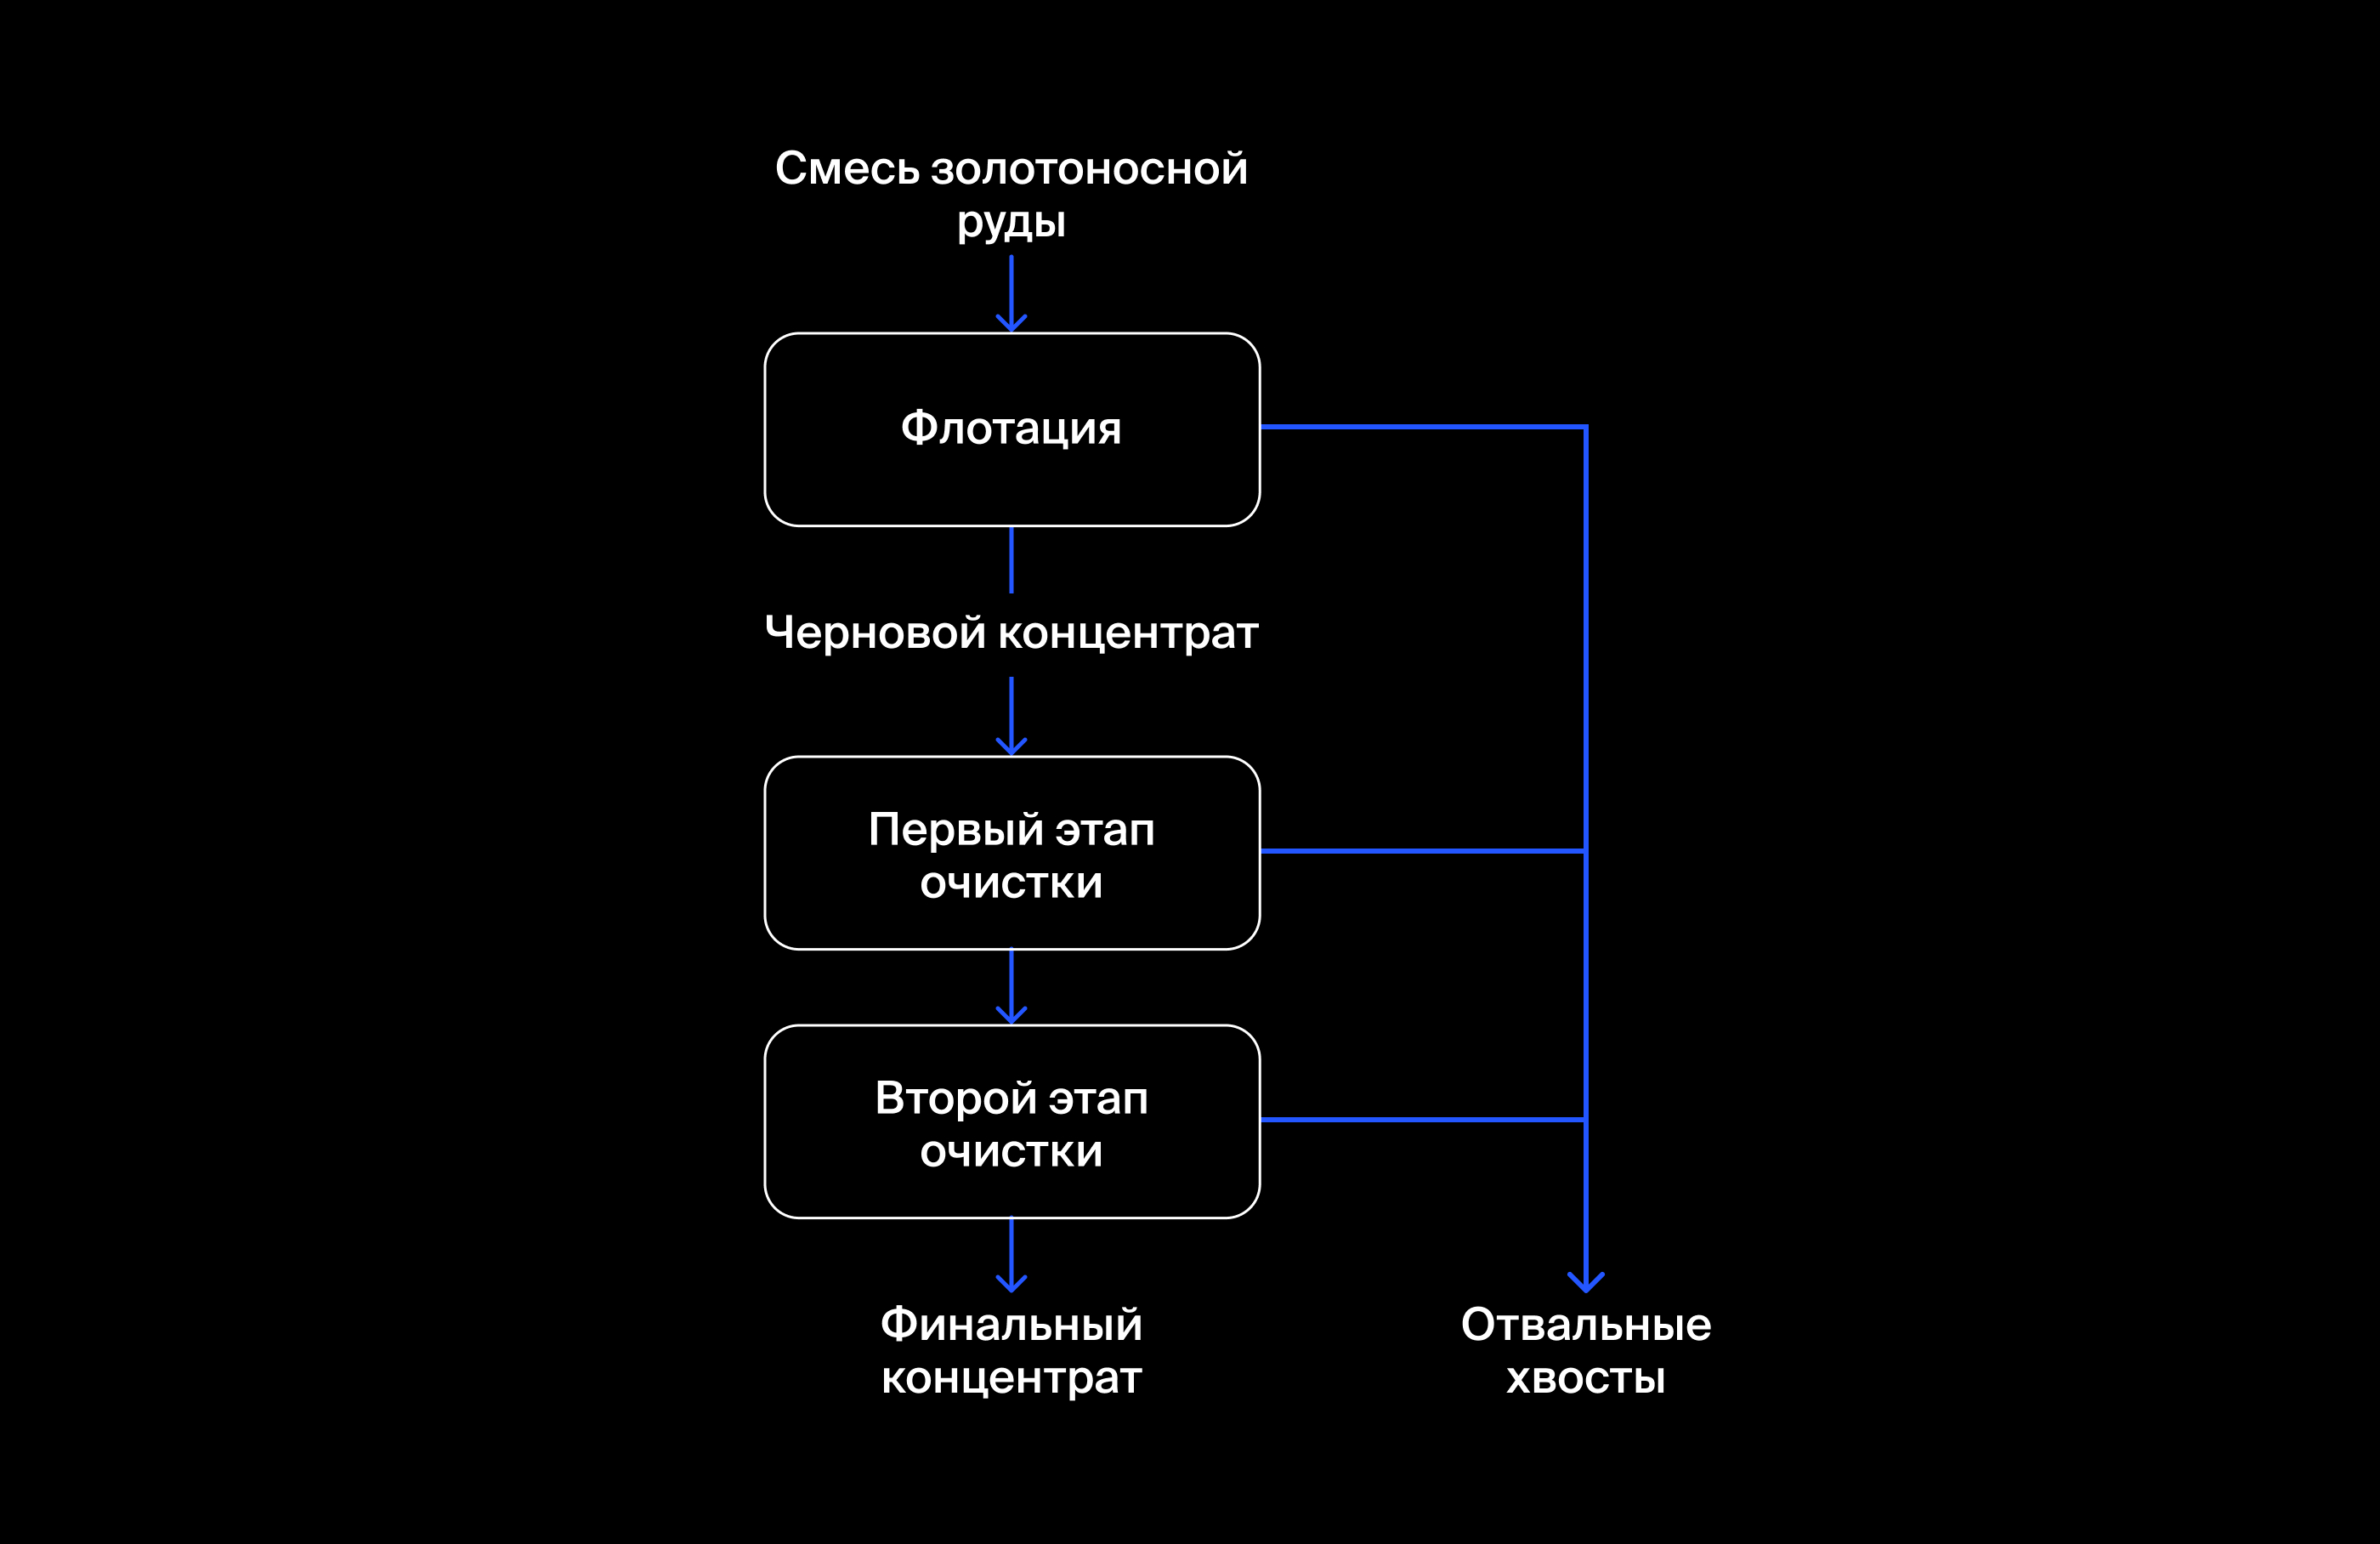

In [7]:
# визуаллизируем в трёх выборках пропуски в процентах и количестве объектов, типы данных
nan_df = pd.DataFrame({
    '% FULL': full_df.isna().mean()*100, 
    'Количество full': full_df.isna().sum(),
    'type full': full_df.dtypes,
    '% TRAIN': train_df.isna().mean()*100, 
    'Количество train': train_df.isna().sum(),
    'type train': train_df.dtypes,
    '% TEST': test_df.isna().mean()*100, 
    'Количество test': test_df.isna().sum(),
    'type test': test_df.dtypes
                })
nan_df.style.background_gradient(cmap='BuPu').set_precision(2)

,% FULL,Количество full,type full,% TRAIN,Количество train,type train,% TEST,Количество test,type test
date,0.00,0,object,0.00,0,object,0.00,0.00,object
final.output.concentrate_ag,0.01,1,float64,0.01,1,float64,nan,nan,nan
final.output.concentrate_au,0.00,0,float64,0.00,0,float64,nan,nan,nan
final.output.concentrate_pb,0.01,1,float64,0.01,1,float64,nan,nan,nan
final.output.concentrate_sol,1.09,211,float64,1.49,211,float64,nan,nan,nan
final.output.recovery,0.00,0,float64,0.00,0,float64,nan,nan,nan
final.output.tail_ag,0.01,1,float64,0.00,0,float64,nan,nan,nan
final.output.tail_au,0.00,0,float64,0.00,0,float64,nan,nan,nan
final.output.tail_pb,0.52,101,float64,0.71,100,float64,nan,nan,nan
final.output.tail_sol,0.03,6,float64,0.04,5,float64,nan,nan,nan


***Пропуски:***
- Пропуски есть во многих признаках, в основном единичные. 
- Один признак `secondary_cleaner.output.tail_sol` имеет высокое значение 9% пропусков в исходном датафрейме. Он нам не понадобится для обучения, так как его нет в тестовой выборке, скорее всего, удалим его без обработки.
- В тестовой выборке количество пропусков незначительное

По условию мы знаем, что "соседние по времени параметры часто похожи", поэтому планируем пропуски дальше заполнить похожими на соседние по времени значениями.

***Отсутствие признаков в тестовой выборке:***
- В тестовой выборке отсутствуют все параметры, относящиеся к конечному продукту `output` и расчётным характеристикам `calculate`. Пока это видится логичным, так как эти признаки определяются в процессе и на выходе, а наша цель предсказывать конечный результат по первичным измерениям. Соответственно, тестовая выборка с сокращенным набороом признаков имитируют реальный набор данных, который модель будет получать на входе. 
Далее из обучающей выборки также удалим эти признаки.

***Типы данных:***
- У всех признаков кроме даты подходящий тип данных float 
- Дату переведём в тип datetime и установим индексом

Проверим дубликаты

In [8]:
# проверим на наличие повторяющихся скважин
[df.duplicated().sum() for df in dic_df.values()]

[0, 0, 0]

Явные строки-дубликаты отсутствуют.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные осмотрели - отлично!


### Дата

Дату переведём в формат datetime и сделаем индексом датафреймов, чтобы мы могли её дальше использовать для индексации и заполнения пропусков.

Дополнительно оценим, за какой период предоставлены данные, непрерывный ли он и как отобрана тестовая выборка.

In [9]:
# изменим тип данных с object на datetime
for df in dic_df.values():
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Дату привели к нужному типу - отлично!

Посмотрим какой период нам предоставлен и распределение данных в нём

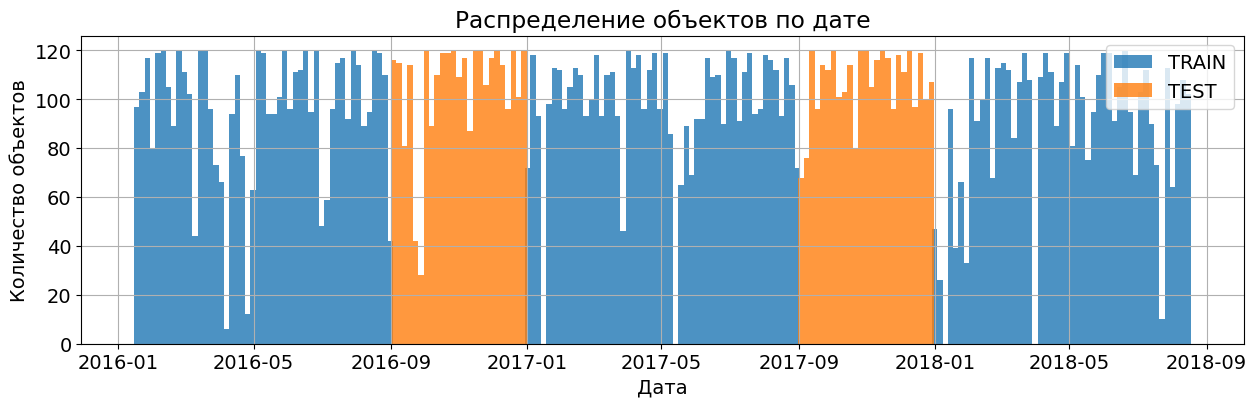

In [10]:
# гистограмма по дате тестовой и обучающей выборок
train_df['date'].dt.date.hist(bins=200, alpha=0.8, figsize=(15,4))
test_df['date'].dt.date.hist(bins=100, alpha=0.8)
plt.title('Распределение объектов по дате')
plt.legend(['TRAIN', 'TEST'])
plt.xlabel('Дата')
plt.ylabel('Количество объектов')
None

In [11]:
# в цикле или функции перезаписать датафрейм с новыми индексами не получатся, поэтому перезапишем каждый по очереди
full_df = full_df.set_index('date')
train_df = train_df.set_index('date')
test_df = test_df.set_index('date')

Теперь дата является индексом датафреймов.

Данные представлены за период янв. 2016 - сент. 2019.  

Для тестовой выборки взяты полностью два непрерывных равноудалённых периода внутри общего: ~ сент. - дек. 2016, сент.- дек. 2017.

Возможно, данный вид работ связан с сезонностью и для заказчика именно в этот период года важно прогнозирование. Также не исключаем, что просто взяты равноудалённые периоды.

***Промежуточные итоги:***

• Предоставлено 3 выборки: полная, которая разделена на тренировочную ~ 73% и тестовую 27%, период янв. 2016 - сент. 2019. Всего 87 признаков и 19439 объектов, дубликатов не выявлено.  

• В тестовом наборе на 34 признака меньше: отсутствуют целевые, расчётные и относяшиеся к финальному продукту. Объекты для теста взяты за два непрерывных периода внутри общего.

• Во всех выборках есть пропуски, в основном единичные. Далее в обучающей заолним интерполяцией по времени, а из тестовой удалим.

• Дата/'date' переведёна в формат datetime и сделана индексом.

• Типы данных всех остальных признаков корректный - float.

___

## Анализ данных
На этом этапе будем исследовать корректность данных, насколько это возможно, и взаимосвязи признаков.

### Целевой признак

Проанализируем сначала целевые признаки:
- эффективность обогащения чернового концентрата `rougher.output.recovery`
- эффективность обогащения финального концентрата `final.output.recovery`.

Эффективность обогащения рассчитывается по формуле:

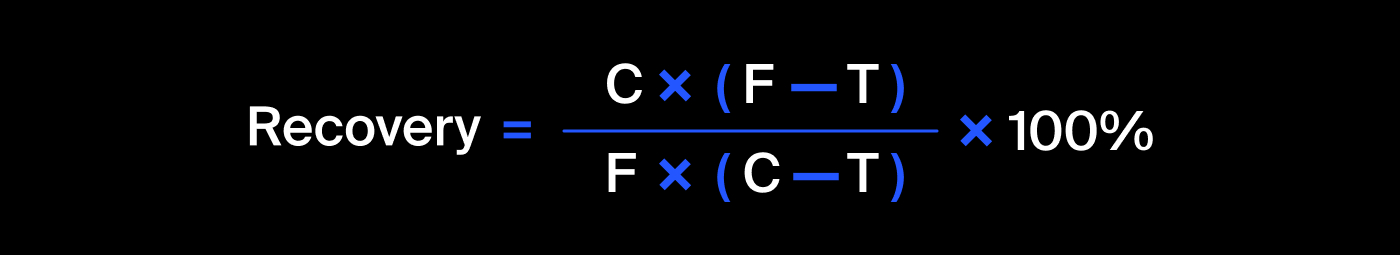
где:  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.

#### Проверка расчёта эффективности обогащения


Проверим, что эффективность обогащения золота после флотации `rougher.output.recovery` рассчитана правильно. Вычислим recovery по формуле ниже и сравним со значениями в тренировочной выборке, используя среднюю абсолютную ошибку  MAE.

В необходимых для расчёта признаках пропусков нет.


In [12]:
# для расчёта эффективности обогащения золота после флотации rougher.output.recovery признаками будут
C = train_df['rougher.output.concentrate_au'] # доля золота в концентрате после флотации;
F = train_df['rougher.input.feed_au'] # доля золота в сырье;
T = train_df['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации

In [13]:
# формула расчёта эффективности обогащения
recovery_rougher_calc = ((C*(F-T)) / (F*(C-T))) *100

In [14]:
f'MAE: {mean_absolute_error(train_df["rougher.output.recovery"], recovery_rougher_calc)}'

'MAE: 9.73512347450521e-15'

Средняя аблсолютная ошибка вычисленной эффективности обогащения близка к нулю, следовательно, подтверждаем, что в предоставленных данных расчёты верные.

#### Распределения

Посмотрим распределения целевых признаков.

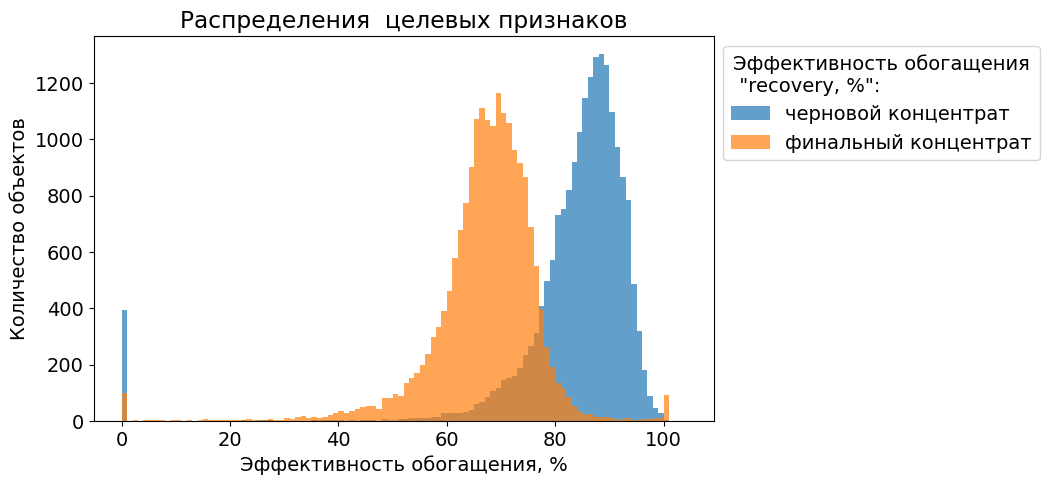

In [15]:
# гистограммы
full_df[[ 'rougher.output.recovery', 'final.output.recovery']].plot(kind='hist', bins=range(0, 105), figsize=(8,5),
                        alpha=0.7, title=('Распределения  целевых признаков'))
plt.xlabel('Эффективность обогащения, %')
plt.ylabel('Количество объектов')
plt.legend(['черновой концентрат', 'финальный концентрат'], title='Эффективность обогащения\n "recovery, %":', 
           bbox_to_anchor=(1, 1))
None

In [16]:
# посмотрим на статистики распределений
full_df[[ 'rougher.output.recovery', 'final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,19439.000000,19439.000000
mean,83.328587,67.050208
std,14.148086,10.125840
min,0.000000,0.000000
25%,81.037957,63.299712
50%,86.188892,68.172738
75%,90.010670,72.686642
max,100.000000,100.000000


- recovery финального концентрата меньше, чем чернового (средние 67 vs 83)
- у обоих параметров есть пик в нуле, не относящийся к общему распределению
- финальный концентрат также имеет аномальный пик на максимальноом значении 100%.

Предполагаемые причины аномальных значений рассчитанного параметра recovery %:

- Нули являются следствием наличия нулевых концентраций золота на разных стадиях, что может быть связано с: 
    1) технологическая проблема из-за которой неэффективно прошёл процесс обогащения: нарушение технологии, проблема реагентов, проблема оборудования + ошибка измерения; 
    2) обрабатывалась пустая порода; 
    3) ошибка при занесении данных или техническая при их хранении и передаче.
    
- На первый взгляд 100%-ная эффективность маловероятна из-за наличия примесей. Но если я правильно поняла, то это возможно, так как эффективность обогащения финишного концентрата рассчитывается относительно концентрата после первой очистки и будет равна 100%, если концентрация в хвосте равна 0. Здесь также нулевые значения в хвосте могут быть следствием описанных выше причин.

Требуется уточнение выявленных "аномальных" значений у профильного специалиста.

*Так как возможность уточнения у специалиста отсутствует, удалим выявленные "аномалии" при предобработке данных.*


### Корреляция
Будем рассматривать только линейную зависимость.
Посмотрим корреляцию между целевыми признаками.

In [17]:
# линейная зависимость между целевыми признаками
full_df[ 'rougher.output.recovery'].corr(full_df['final.output.recovery'])

0.3270587324133114

In [18]:
full_df[test_df.columns].shape

(19439, 52)

Между целевыми признаками очень незначительная линейная связь. Возможно, такое значение коэффициента Пирсона может свидетельствовать о наличии нелинейной связи.

Теперь между целевыми и остальными признаками.  


In [19]:
# recovery ROUGHER все признаки
full_df.corrwith(full_df['rougher.output.recovery']).abs().sort_values( ascending=False).head(15)

rougher.output.recovery                     1.000000
rougher.output.concentrate_ag               0.661330
rougher.output.concentrate_sol              0.604420
rougher.output.concentrate_au               0.579638
rougher.output.concentrate_pb               0.552622
rougher.output.tail_au                      0.360848
final.output.recovery                       0.327059
rougher.output.tail_pb                      0.304693
primary_cleaner.input.sulfate               0.279260
rougher.input.floatbank10_xanthate          0.244823
rougher.input.floatbank11_xanthate          0.241153
rougher.output.tail_ag                      0.231035
secondary_cleaner.state.floatbank4_b_air    0.227642
secondary_cleaner.state.floatbank4_a_air    0.212177
rougher.input.feed_sol                      0.197475
dtype: float64

Есть  линейная зависимость ~ 0.6 recovery флотации от концентраций всех 4 компонентов после флотации (золото очевидно, так как используется в рассчёте). Эти признаки относятся к выходу этапа флотации -  они не будут использованы для обучения.


In [20]:
# recovery финального концентрата от остальных признаков
full_df[test_df.columns].corrwith(full_df['final.output.recovery']).abs().sort_values( ascending=False).head(10)

primary_cleaner.input.sulfate         0.366954
rougher.input.floatbank11_xanthate    0.328231
rougher.input.floatbank10_xanthate    0.328066
rougher.input.feed_au                 0.295343
rougher.input.feed_ag                 0.286823
rougher.input.feed_sol                0.250058
primary_cleaner.input.xanthate        0.206445
rougher.state.floatbank10_a_air       0.183251
rougher.input.feed_pb                 0.175646
rougher.input.feed_rate               0.172786
dtype: float64

Recovery финального концентрата значительно меньше линейно зависим от признаков.


Попробуем поверхностно проанализировать линейную зависимость между прогнозирующими признаками.  
Более всего нам интересны зависимости с признаками, используемыми для расчёта recovery

In [21]:
# функция для определения пар признаков с высоким коэффициентом корреляции Пирсона
def corr_pairs_func(df, x=0.7):

    # создадим матрицу корреляций для полного датафрейма
    corr_matrix = df.corr()

    # фильтрация матрицы корреляций, чтобы оставить только значения больше 0.7
    corr_pairs = corr_matrix[(corr_matrix.abs() > x)]

    # преобразование матрицы корреляций в список пар признаков
    corr_pairs = corr_pairs.unstack().reset_index()

    # фильтрация списка пар признаков, чтобы убрать пропуски и не повторять пары 
    corr_pairs = corr_pairs[(corr_pairs['level_0'] > corr_pairs['level_1']) & (~corr_pairs[0].isna())
               & (~corr_pairs['level_0'].str.contains('floatbank'))] # большинство пар относились к параметрам floatbank

    # вывод списка пар признаков
    return corr_pairs.sort_values(by=0, ascending=False)

In [22]:
# сначала оценим все признаки в полной выборке
corr_pairs_func_full = corr_pairs_func(full_df)
corr_pairs_func_full

,level_0,level_1,0
1565,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_ag,0.926268
3916,rougher.output.concentrate_sol,rougher.output.concentrate_au,0.868293
3301,rougher.input.feed_au,rougher.input.feed_ag,0.845274
2843,rougher.input.feed_ag,final.output.tail_ag,0.777677
2930,rougher.input.feed_pb,final.output.tail_pb,0.773465
4434,rougher.output.tail_au,rougher.output.tail_ag,0.770701
1303,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_ag,0.724903
4265,rougher.output.tail_pb,rougher.output.tail_au,0.712072


In [23]:
# корреляция в тренировочной выборке между отобранными для теста признаками
corr_pairs_func_train = corr_pairs_func(train_df[test_df.columns], 0.6)
corr_pairs_func_train

,level_0,level_1,0
896,rougher.input.feed_au,rougher.input.feed_ag,0.845670
693,rougher.input.feed_pb,rougher.input.feed_au,0.691097
884,rougher.input.feed_au,primary_cleaner.input.sulfate,0.609566


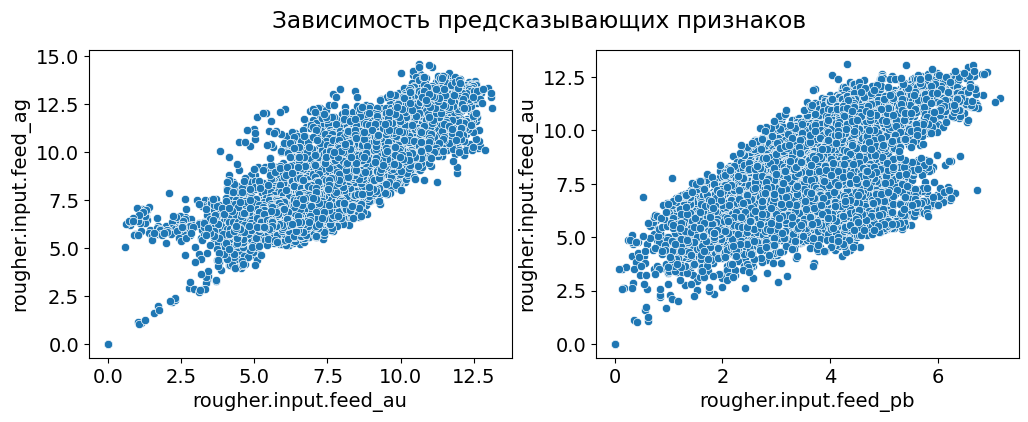

In [24]:
# визуализируем линейные зависимости в трейне двух пар
fig, axs = plt.subplots(1, 2, figsize=(12,4))
for col1, col2, i in zip(corr_pairs_func_train.iloc[:2]['level_0'], 
                         corr_pairs_func_train.iloc[:2]['level_1'], 
                         range(2)):    
    sns.scatterplot(x=train_df[col1], y=train_df[col2], ax=axs[i])
plt.suptitle('Зависимость предсказывающих признаков')
None

- В тренировочной выборке достаточно сильная линейная зависимость концентрации золота в сырье `rougher.input.feed_au` от концентраций серебра и свинца в сырье.
- Также есть сильные линейные зависимости между признаками, относящимися к параметрам функциональных установок `floatbank` - в основном, уровень жидкость, объем воздуха. Для анализа их значимости мы бы обратились к ответственному специалисту.  

Выявлена мультиколлинеарность, но:
- концентрации сырья это  ключевые признаки, удалять не будем
- из линейных будем использовать модели с регуляризацией (правильно я понимаю, что они невелируют мультиколлинеарность?)

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

Для анализа возьмём из полного датасета столбцы со значениями концентраций металлов в сырье и после каждой стадии процесса.

In [25]:
# # выведем названия столбцов, содержащих названия металлов, чтобы выбрать нужные с концентрациями золота
for i in ['au', 'ag', 'pb']:
    display([col for col in full_df.columns if i in col])

['final.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au']

['final.output.concentrate_ag',
 'final.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_ag',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_ag',
 'secondary_cleaner.output.tail_ag']

['final.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_pb']

In [26]:
# зададим в переменных повторяющиеся части в названиях признаков
feed = 'rougher.input.feed_'
rougher = 'rougher.output.concentrate_'
primary = 'primary_cleaner.output.concentrate_'
final = 'final.output.concentrate_'
# сделаем из них список
steps = [feed, rougher, primary, final]

In [27]:
dic_me_steps = {}
for me in ['au', 'ag', 'pb']:
    dic_me_steps[me] = [step + me for step in steps]
    
dic_me_steps

{'au': ['rougher.input.feed_au',
  'rougher.output.concentrate_au',
  'primary_cleaner.output.concentrate_au',
  'final.output.concentrate_au'],
 'ag': ['rougher.input.feed_ag',
  'rougher.output.concentrate_ag',
  'primary_cleaner.output.concentrate_ag',
  'final.output.concentrate_ag'],
 'pb': ['rougher.input.feed_pb',
  'rougher.output.concentrate_pb',
  'primary_cleaner.output.concentrate_pb',
  'final.output.concentrate_pb']}

In [28]:
# функция для построения гистограмм и боксплотов для концентраций на разных стадиях процесса 
# на вход список колонок со значениями концентраций и название компонента
def hist_boxplot_conc(cols, name):
    fig, axs = plt.subplots(1, 2, figsize=(20,6), gridspec_kw={'width_ratios': [1, 1.5]})
    # ящик с усами на  графике слева
    sns.boxplot(data=full_df[cols], ax=axs[0], orient='h').set_xlabel(f'Концентрация {name}')
    # гистограммы на втором
    sns.histplot(data=full_df[cols], kde=True, bins='auto', edgecolor=None) 
    plt.suptitle(f'Изменение концентрации {name} по стадиям процесса')
    plt.legend( ['финишный\n концентрат',
                 'после первой\n очистки',
                 'черновой\n концентрат', 
                'сырьё'], title=f'Концентрации {name}:', loc='upper left', bbox_to_anchor=(1, 1)) # 
    plt.xlabel(f'Концентрация {name}')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

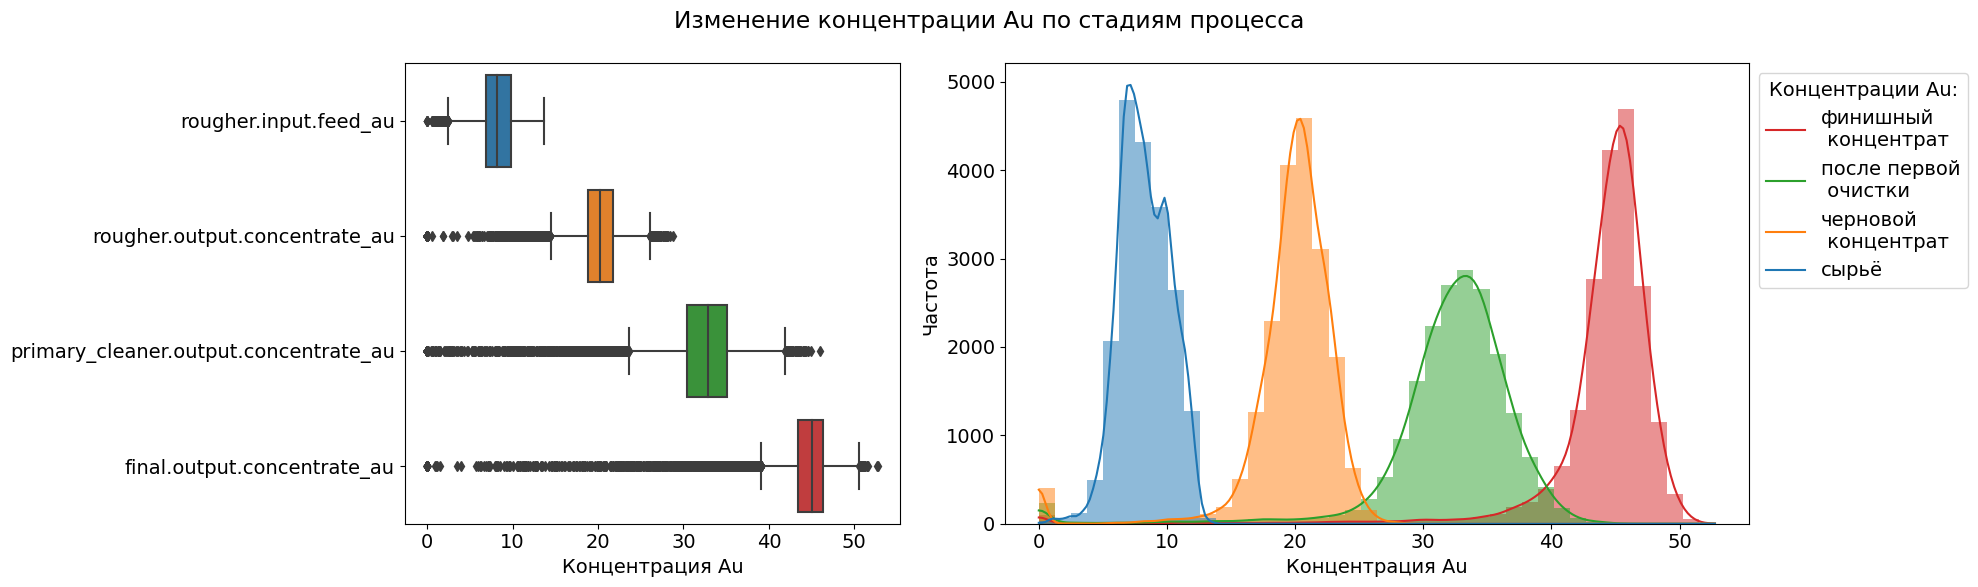

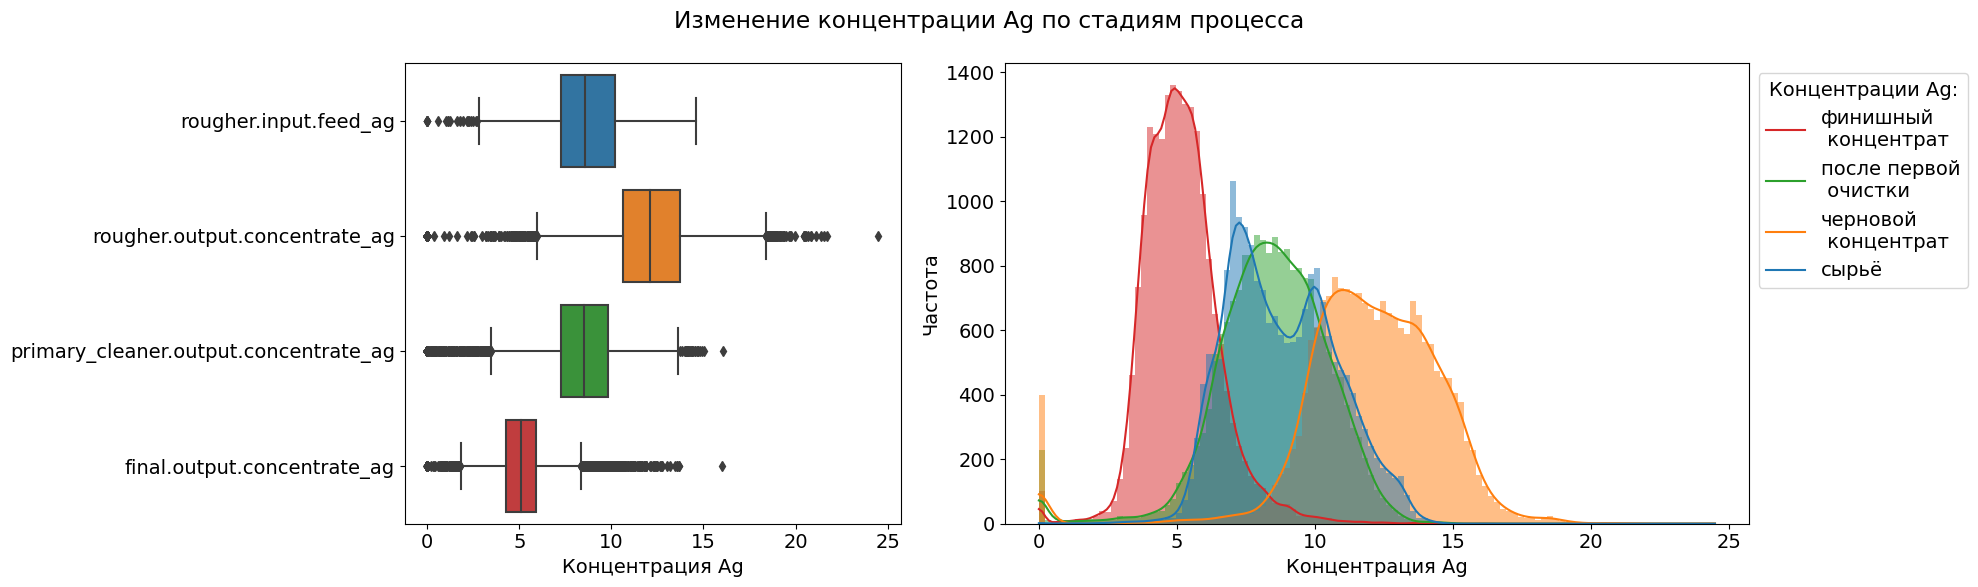

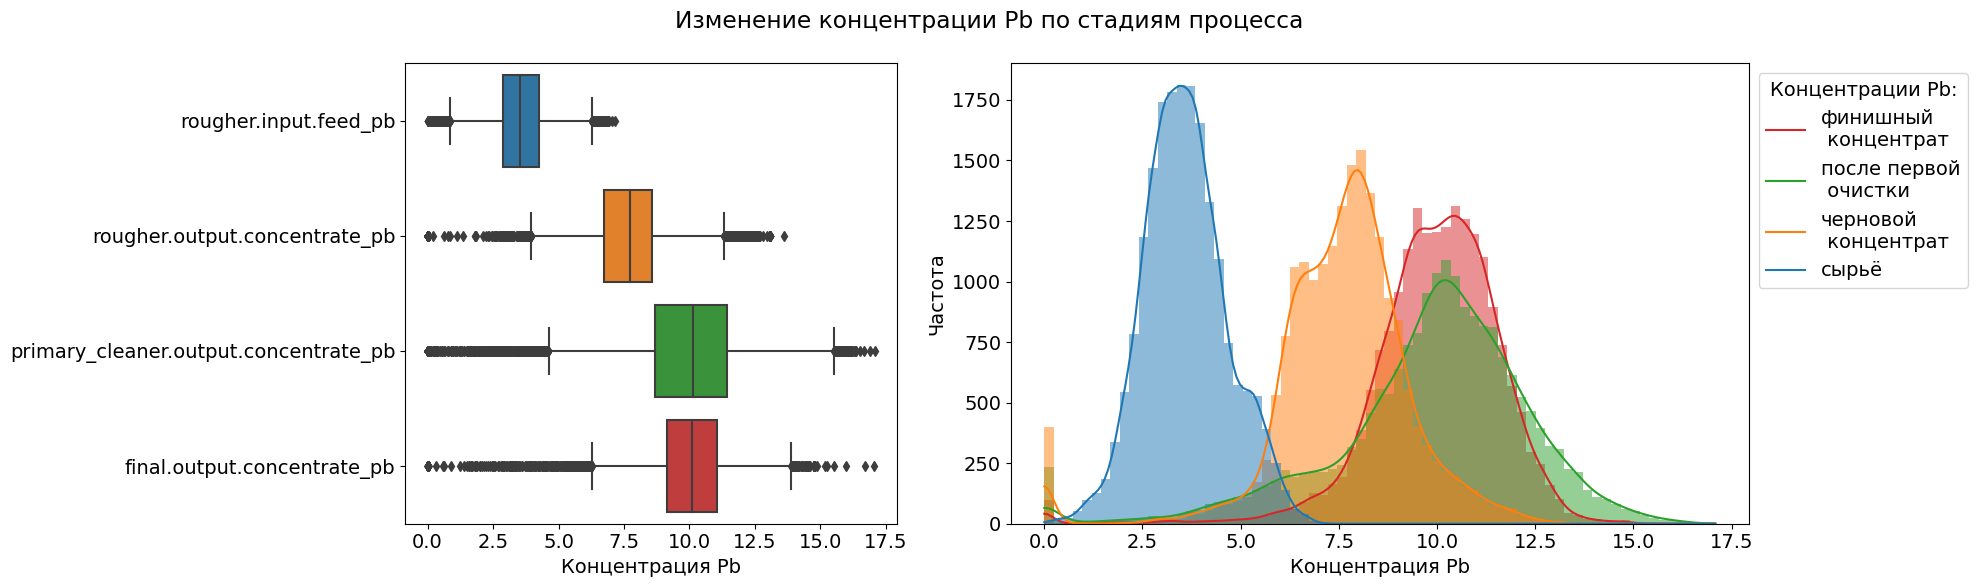

In [29]:
# построим графики для трёх металлов
hist_boxplot_conc(dic_me_steps['au'], 'Au')
hist_boxplot_conc(dic_me_steps['ag'], 'Ag')
hist_boxplot_conc(dic_me_steps['pb'], 'Pb')

- **Au:** Концентрация золота в руде самая высокая - в конечном продукте в седнем ~ 45 у.е. Очевидно выражена закономерность: с каждой стадией процесса концентрация золота увеличивается, с большой вероятностью по концентрации можно установить стадию процесса.
- **Ag:** Концентрация серебра после флотации увеличивается, а далее поэтапно при очистках уменьшается до значений меньших исходного - в финишном продукте в среднем 5 у.е.  
- **Pb:** Исходное содержание наименьшее по сравнению с двумя другими металлами, в процессе увеличивается и достигает своего максимума уже после первой очистки ~ 10 у.е.
- Везде есть нулевые значения. Предполагаемые причины ранее указывали.

Для расчёта Recovery также используется концентрация золота в хвостах. Аналогично посмотрим, как она меняется.  
Почему-то мы имеем 4 хвоста: после флотации, первой и второй очисток, и ещё один финальный, то есть также после второй очистки. Вопрос для уточнения у специалиста.

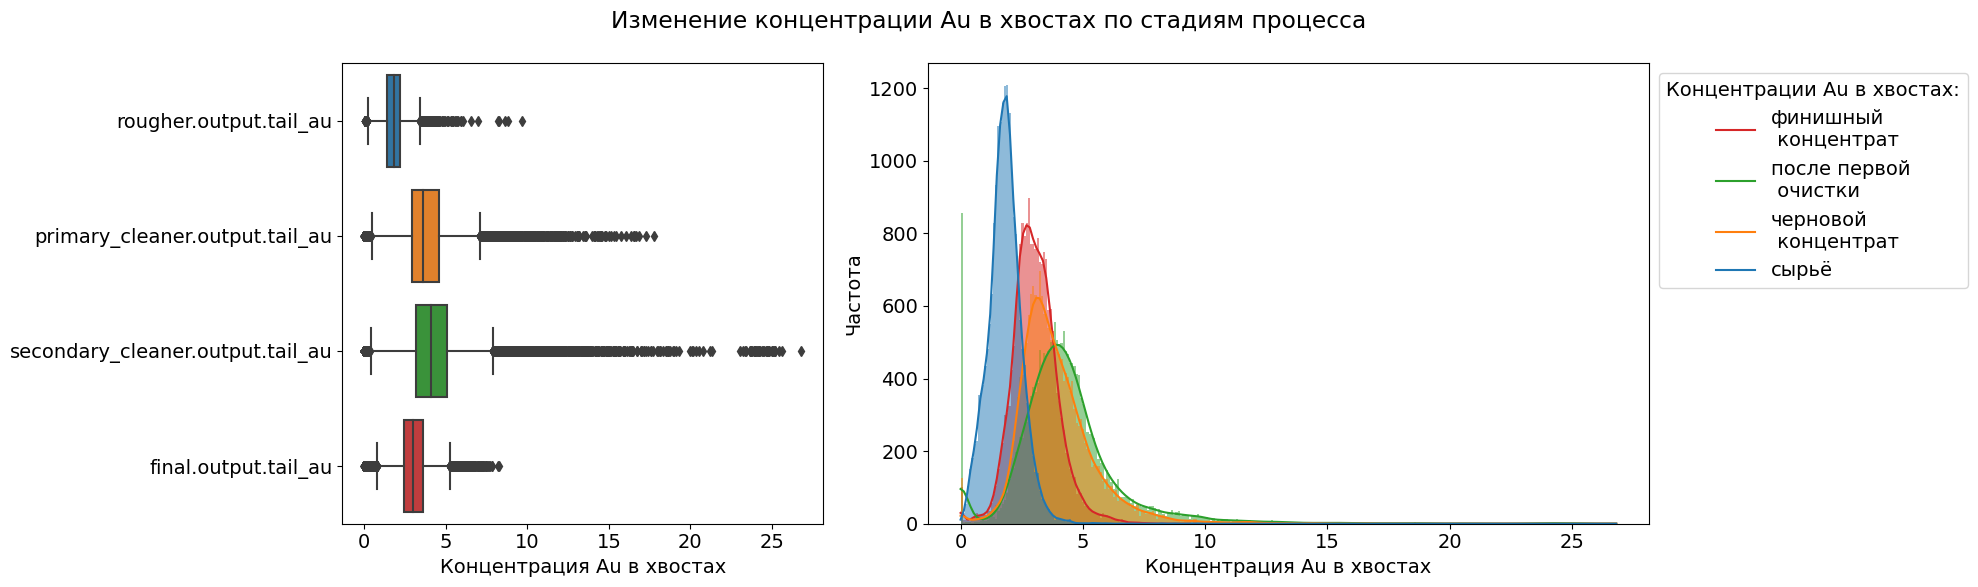

In [30]:
# изменение концентрации золота в хвостах по стадиям
hist_boxplot_conc(['rougher.output.tail_au',  'primary_cleaner.output.tail_au',
            'secondary_cleaner.output.tail_au', 'final.output.tail_au'], 'Au в хвостах')
# легенда некорректная

В хвостах концентрация золота после флотации и очисток также увеличивается, в финальном "неопознанном" хвосте немного уменьшается.

### Анализ распределения  данных в тренировочной и тестовой выборках
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.    

In [31]:
# постмотрим, какие признаки связаны с размером гранул
[col for col in full_df.columns if 'feed_size' in col]

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

Есть два признака с размером гранул: сырья и чернового концентрата (после флотации). Сравним оба.

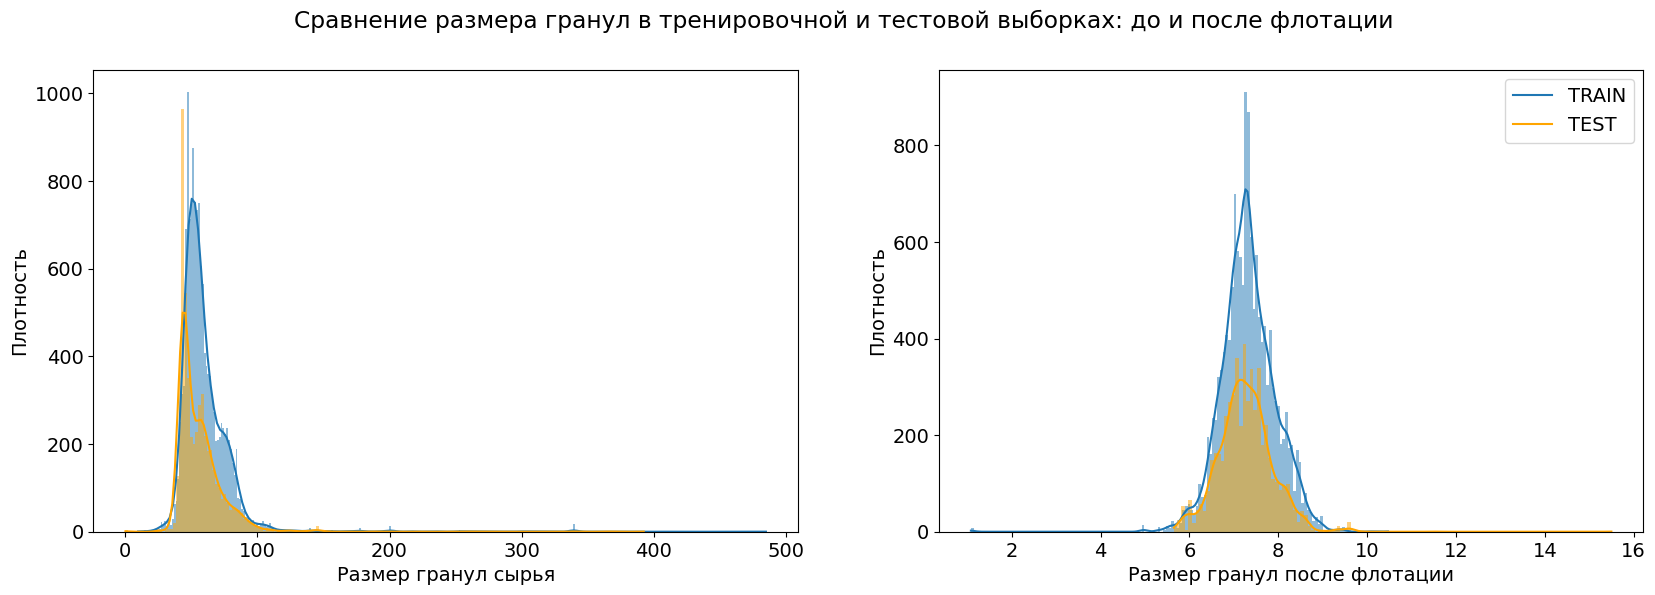

In [32]:
# строим графики сравнения паспределения размера гранул между тестовой и обучающей выборками
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# для сырья
sns.histplot(train_df['rougher.input.feed_size'], bins='auto', alpha=0.5,  ax=axs[0], kde=True, edgecolor=None)\
            .set_ylabel('Плотность')
sns.histplot(test_df['rougher.input.feed_size'], bins='auto', alpha=0.5, ax=axs[0], color='orange', kde=True,
            edgecolor=None).set_xlabel('Размер гранул сырья')
# для чернового концентрата

sns.histplot(train_df['primary_cleaner.input.feed_size'], bins='auto', alpha=0.5,  ax=axs[1], kde=True,
            edgecolor=None).set_ylabel('Плотность')
sns.histplot(test_df['primary_cleaner.input.feed_size'], bins='auto', alpha=0.5, ax=axs[1], color='orange', kde=True,
            edgecolor=None).set_xlabel('Размер гранул после флотации')

plt.suptitle('Сравнение размера гранул в тренировочной и тестовой выборках: до и после флотации')
plt.legend(['TRAIN', 'TEST'])
None

Распределения размера гранул примерно похожи, значит, оценка предсказаний будет правильноо интерпретирована.

От использования статистического теста, который показывает, что распределения разные, отказалась. По информации от преподавателя для машинного обучения достаточно примерного визуально соответствующего распределения.

- Распределение размера гранул после флотации становится более равномерным, размер уменьшается в ~ 10 раз.

### Суммарная концентрация всех компонентов на разных стадиях.
Исследуем суммарную концентрацию всех веществ на разных стадиях.  
У нас есть концентрации 4-х компонентов на каждой стадии в концентратах и хвостах: 'au', 'ag', 'pb', 'sol'.  
Мы посчитаем сумарную концентрацию всех компонентов для каждой стадии: сырьё, черновой концентрат, после первой очистки, финальный концентрат. Запишем результаты в 4-х новых столбцах в полном датафрейме.

In [33]:
# создадим словарь, в котором ключами будут будущие названия колонок, значениями - списки суммируемых признаков: 
# концентрации всех элементов в концентрате (без хвостов) на конкретной стадии
dic_sum_conc = {}
for step in steps:
    dic_sum_conc['SUM.' + step] = [step + me for me in ['au', 'ag', 'pb', 'sol']]
# проверим, чтто получили в словаре    
dic_sum_conc

{'SUM.rougher.input.feed_': ['rougher.input.feed_au',
  'rougher.input.feed_ag',
  'rougher.input.feed_pb',
  'rougher.input.feed_sol'],
 'SUM.rougher.output.concentrate_': ['rougher.output.concentrate_au',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol'],
 'SUM.primary_cleaner.output.concentrate_': ['primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol'],
 'SUM.final.output.concentrate_': ['final.output.concentrate_au',
  'final.output.concentrate_ag',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol']}

In [34]:
# в цикле пройдёмся по элементам словаря: на каждом цикле создадим новый столбец с именем ключа, 
# содержимым столбца будут суммы значений в столбцах из списка в values словаря для каждого объекта
for name, cols in dic_sum_conc.items():
    full_df[name] = full_df[cols].sum(axis=1)

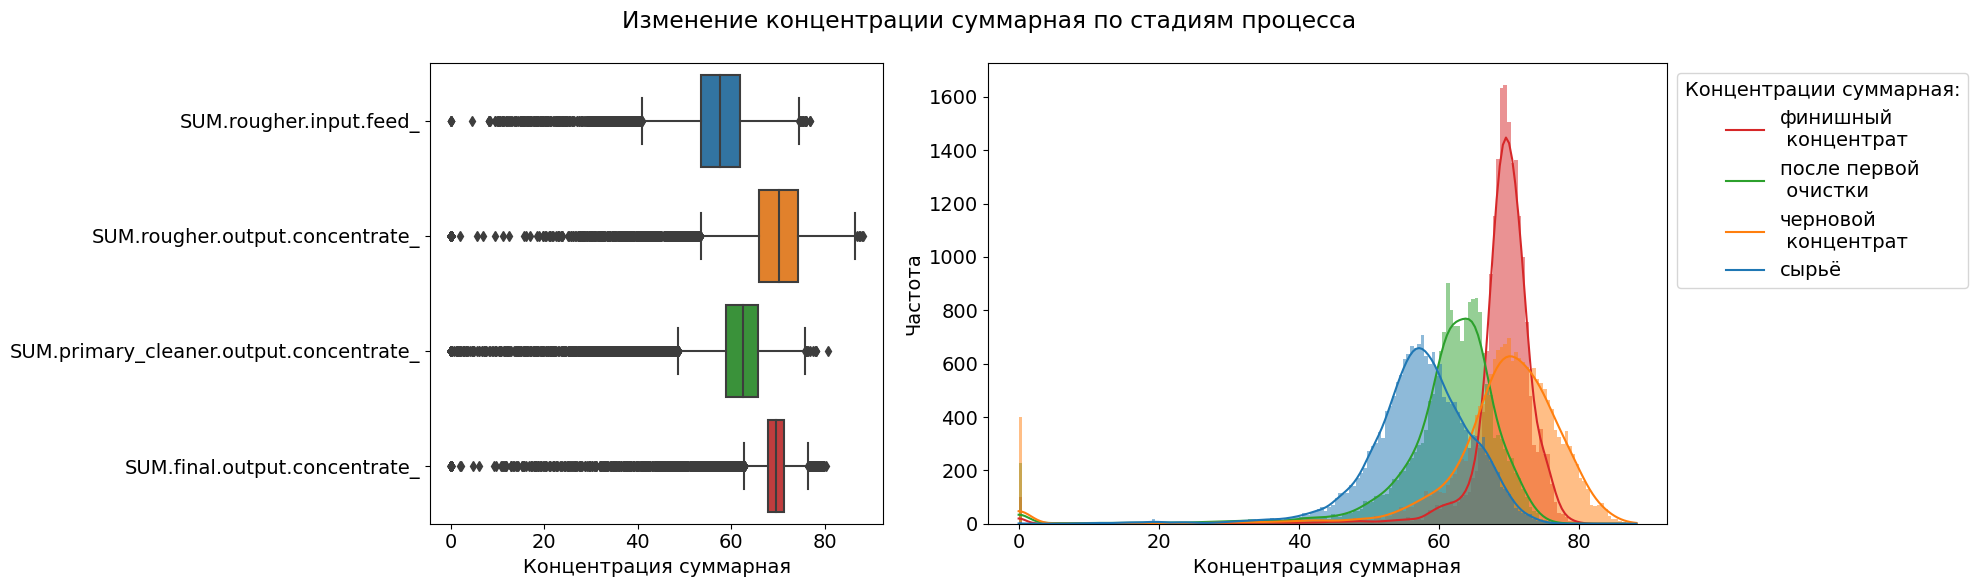

In [35]:
# построим гистограммы и боксплоты для 4 ноовых признаков, применив ранее созданную функцию
hist_boxplot_conc(dic_sum_conc.keys(), 'суммарная')


In [36]:
# численно
full_df[list(dic_sum_conc.keys())].describe().T

,count,mean,std,min,25%,50%,75%,max
SUM.rougher.input.feed_,19439.0,57.148832,7.712767,0.04,53.507961,57.577384,61.951075,76.978947
SUM.rougher.output.concentrate_,19439.0,68.144520,12.540021,0.00,66.003784,70.177013,74.356904,88.140119
SUM.primary_cleaner.output.concentrate_,19439.0,60.622525,10.202580,0.00,58.883626,62.491150,65.665299,80.749343
SUM.final.output.concentrate_,19439.0,68.621192,7.461966,0.00,67.928471,69.598046,71.368472,80.210644


Распределения показывают, что суммарная концентрация увеличивается после флотации, но потом после первой очистки падает и после второй возрастает. Такая тенденция не соответствует ранее выявленной - доля золота по стадиям увеличивается, а оно имеет самую весомую концентрацию.

Посмотрим, как изменяется суммарная концентрация металлов без учёта  'sol' и самого этого компонента

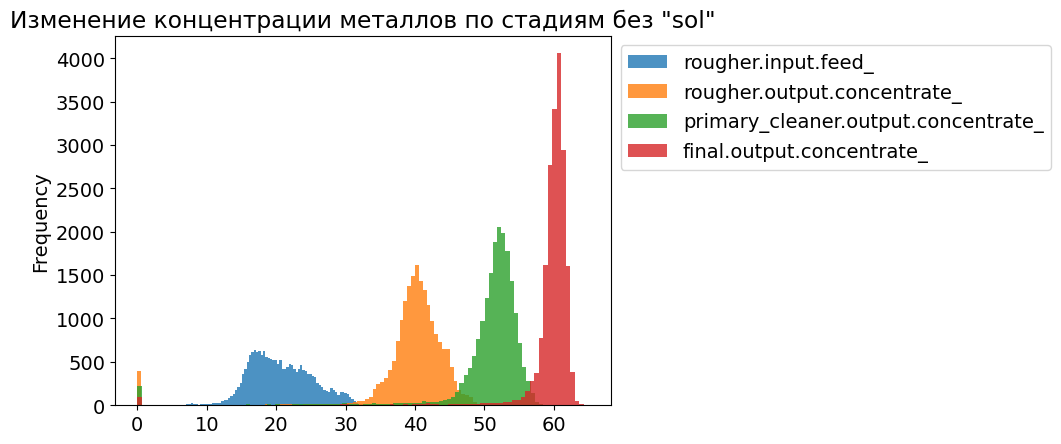

In [37]:
# построим гистограммы для суммарной концентрации без sol на каждой стадии
for step in steps:
    full_df[[step + me for me in ['au', 'ag', 'pb']]].sum(axis=1).plot(kind='hist', bins=100, alpha=0.8)
#     #plt.xlim(-1, 1) # посмотрели, что в нуле
plt.title('Изменение концентрации металлов по стадиям без "sol"')
plt.legend(steps, bbox_to_anchor=(1, 1))
None

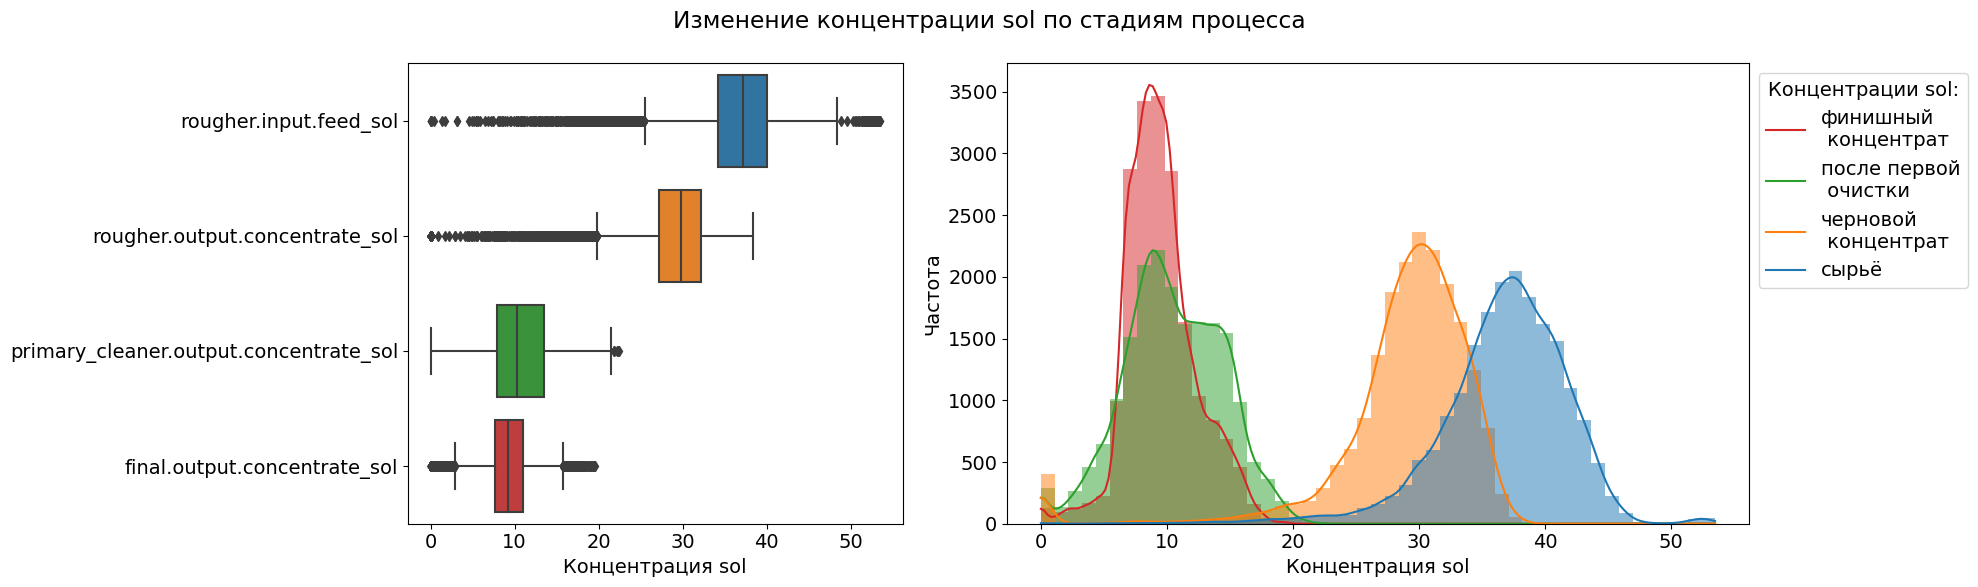

In [38]:
# построим гистограмму и боксплот для компонента 'sol' на каждой стадии
hist_boxplot_conc([step + 'sol' for step in steps], 'sol')

- Теперь мы видим, что суммарная концентрация металлов постадийно увеличивается, а компонента 'sol' уменьшается, что приводит к падению суммарной концентрации всех компонентов после первой очистки. Я бы предположила, что 'sol' - это какой-то твёрдый не подвергшийся обработке остаток, который с каждой стадией уменьшается, или раствор, который частично остаётся при переходе между стадиями.  
- К последней финальной стадии видим, что разброс значений концентрации становится меньше. То есть при разных входящих концентрациях получаем на выходе более постоянный результат.
- На всех стадиях крооме сырья есть нулевые суммарные концентрации. Единственное доступное экспертное мнение говорит, что такого быть не может, поэтому мы удалим объекты, в которых нулевая суммарная концентрация.   
На главной гистограмме видим, что значения суммарной концентрации ниже  30 у.е. встречается редко и возможно относится к выбросам, здесь требуется более глубокий разбор и экспертная оценка.

***Промежуточные итоги:***

• Целевой признак Recovery является расчётной единицей, выражается в процентах. Он расчитывается из доль золота в концентратах и хвостах после флотации и финальной второй очистки. 

• В распределениях значений целевых признаков выявлены подозрительные пики в нуле, также в 100% для финального recovery. Требуется уточнение у специалиста. *При предобработке данных удалим их.*

• Не выявлено значительной линейной зависимости между целевыми признаками и предсказывающими, которые будут подаваться на вход модели.

• Есть мультиколлинеарность между концентрациями металлов в сырье, а также между параметрам функциональных установок `floatbank`. Устранять не планируем, будем испоьзовать модели, которые могут с ней работать.

• Концентрация золота самая весомая, увеличивается с каждой стадией процеса обогащения. Концентрация серебра после флотации увеличивается и начинает уменьшаться. Концентрация свинца увеличивается, после первой очистки достигает максимума.  
• Cуммарная концентрация металлов постадийно увеличивается, а компонента 'sol' уменьшается, что приводит к падению суммарной концентрации всех компонентов после первой очистки.  
• Концентрации металлах в данных могут быть нулевыми, требуется уточнение у специалиста.  
• При этом на всех стадиях крооме сырья выявлены нулевые суммарные концентрации, что маловероятно и в отсутствии консультации специалиста будет исключено из обучающего датасета. 

• Распределение параметров обрабатываемого сырья (размер гранул) в обучающей и тестовой выборках примерно одинаковое.
___

### Предобработка данных
Подготовим данные для обучения модели машинного обучения.
1. Удаление "аномалий": нулевые суммарные концентрации
2. Заполнение пропусков
3. Удаление столбцов из обучающей выборки
4. Разделение на выбоки с предсказывающими и целевым признаком
5. Масштабирование 


In [39]:
# сохраним исходные датасеты
train_df_original = train_df.copy()
test_df_original = test_df.copy()

#### Удаление "аномалий"

Нам нужно очистить уже отделённые тренировочную и тестовую выбоки. Мы очистим полный датасет и из него возьмём нужные индексы , по которым отфильтруем обучающую и тестовую.

In [40]:
# отфильтруем полный датасет по суммарным концентрациям больше 20 и сохраним индексы
cleaned_index = full_df[
                        # суммарные концентрации, не равные нулю
                        (full_df['SUM.rougher.input.feed_'] > 1) & 
                        (full_df['SUM.rougher.output.concentrate_'] > 1) & 
                        (full_df['SUM.primary_cleaner.output.concentrate_'] > 1) &
                        (full_df['SUM.final.output.concentrate_'] > 1) 
                                        # целевые признаки, не равные 0 и 100
                                        & (full_df['rougher.output.recovery'] != 0)
                                        & (full_df['final.output.recovery'] != 0)
                                        & (full_df['final.output.recovery'] != 100)
                           ].index
cleaned_index.shape

(18651,)

In [41]:
# сохраним новые выборки без "аномальных" значений суммарных концентраций, фильтруем по индексам очищенного полного датасета
train_df = train_df[train_df.index.isin(cleaned_index)]
test_df = test_df[test_df.index.isin(cleaned_index)]
# сравним размеры новых и старых выборок
[df.shape[0] for df in [full_df, full_df[full_df.index.isin(cleaned_index)], 
                        train_df_original, train_df, 
                        test_df_original, test_df]]

[19439, 18651, 14149, 13544, 5290, 5107]

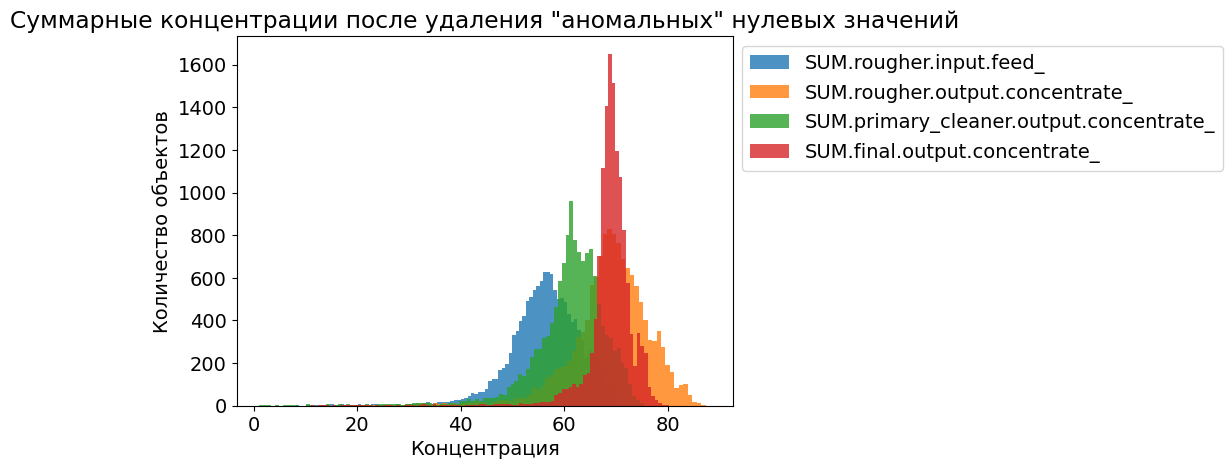

In [42]:
# проверим распределение после удаления значений суммарной концентрации менее 1 в обучающей выборке
for step in steps:
    train_df[[step + me for me in ['au', 'ag', 'pb', 'sol']]].sum(axis=1).plot(kind='hist', bins=100, alpha=0.8)
plt.legend(dic_sum_conc.keys(), bbox_to_anchor=(1, 1))
plt.title('Суммарные концентрации после удаления "аномальных" нулевых значений')
plt.xlabel('Концентрация')
plt.ylabel('Количество объектов')
None

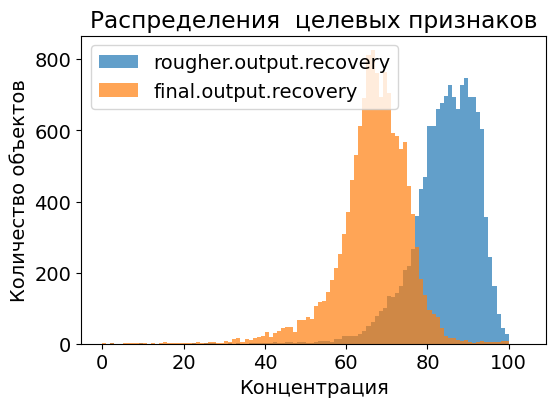

In [43]:
# также проверим, убраны ли нулевые концентрации в целевых признаках в тренировочной выборке
train_df[[ 'rougher.output.recovery', 'final.output.recovery']].plot(kind='hist', bins=range(0, 105), figsize=(6,4),
                        alpha=0.7, title=('Распределения  целевых признаков'))
plt.xlabel('Концентрация')
plt.ylabel('Количество объектов')
None

#### Удаление столбцов
Удалим из тренировочной выборки только столбцы, которые отсутствуют в тестовой выборке.

Пока не удалили, убедимся еще раз, что в целевых признаках нет пропусков.

In [44]:
# проверим пропуски в целевых признаках
train_df['rougher.output.recovery'].isna().sum(), train_df['final.output.recovery'].isna().sum()

(0, 0)

In [45]:
# оставим в тренировочной выборке только столбцы тестовой выборки
train_df = train_df[test_df.columns]
'Размер обучающей выборки:', train_df.shape

('Размер обучающей выборки:', (13544, 52))

#### Заполнение/удаление пропусков

По дате видим, что замеры осуществляются 1 раз в час. Условие задачи говорит, что соседние по времени значения похожи. Заполним все пропуски в тренировочном датасете интерполяцией. 

In [46]:
# пропуски в трейне по убыванию количества
nan_train_table = pd.DataFrame(train_df.isna().sum().sort_values(ascending=False))
nan_train_table.style.background_gradient()
cols_with_nan_in_train = nan_train_table.index[:7]
nan_train_table.style.background_gradient()

,0
rougher.input.floatbank11_xanthate,369
rougher.state.floatbank10_e_air,362
secondary_cleaner.state.floatbank2_a_air,209
rougher.input.feed_size,138
primary_cleaner.input.xanthate,81
rougher.input.feed_pb,68
rougher.input.feed_sol,57
rougher.input.floatbank11_sulfate,28
rougher.input.floatbank10_sulfate,19
primary_cleaner.input.depressant,15


In [47]:
# применим инструмент interpolate ко всему тренировочному датафрейму
train_df = train_df.interpolate()

# проверим общее количество пропусков
'Пропуски в обучающей выборке:', train_df.isna().sum().sum()

('Пропуски в обучающей выборке:', 0)

Посмотрим на количество пропусков в тестовой выборке

In [48]:
# общее количество пропусков и всего строк в датафрейме
f'Пропуски в тестовой выборке: {test_df.isna().sum().sum()}, Размер тестовой выборки: {test_df.shape[0]}'

'Пропуски в тестовой выборке: 62, Размер тестовой выборки: 5107'

Количество незначительное, удалим все объекты с пропусками

In [49]:
# удалим все строки с пропусками и перезапишем
test_df = test_df.dropna()
f'Пропуски в тестовой выборке: {test_df.isna().sum().sum()}, Размер тестовой выборки: {test_df.shape[0]}'

'Пропуски в тестовой выборке: 0, Размер тестовой выборки: 5060'

#### Разделение выборок на фичи и целефой признак
Нужно спрогнозировать две величины:
- эффективность обогащения чернового концентрата `rougher.output.recovery`
- эффективность обогащения финального концентрата `final.output.recovery`.

Будем строить 2 модели для каждого признака, значит, подготовим для каждого по набору выборок.  

• ROUGHER - предсказание проводим только по признакам, относящимся к входящим rougher.input для стадии флотации и текущего состояния процесса rougher.state (возможно использование признаков текущего состояния неверно, требуется уточнение специалиста).

• FINAL - предсказание по всем признакам предоставленного нам тестового датасета

In [50]:
# ___TRAIN___
# ROUGHER 
# признаки из трейн только содержащие в названии rougher
features_train_rougher = train_df[train_df.columns[train_df.columns.str.contains('rougher')]]
# целевой признак recovery после флотации, берём из полного датасета по индексам датасета с фичами
target_train_rougher = full_df.loc[features_train_rougher.index, 'rougher.output.recovery']

# FINAL
# вся очищенная обучающая выборка
features_train_final = train_df
# целевой признак recovery финального, берём из полного датасета по индексам датасета с фичами
target_train_final = full_df.loc[features_train_final.index, 'final.output.recovery']

#___TEST___
# ROUGHER 
features_test_rougher = test_df[test_df.columns[test_df.columns.str.contains('rougher')]]
target_test_rougher = full_df.loc[features_test_rougher.index, 'rougher.output.recovery']

# FINAL
features_test_final = test_df
target_test_final = full_df.loc[features_test_final.index, 'final.output.recovery']

# проверим
[df.shape for df in [train_df_original, 
                    features_train_rougher, target_train_rougher, 
                    features_train_final, target_train_final,
                     test_df_original,
                    features_test_rougher, target_test_rougher,
                    features_test_final, target_test_final]]
                    


[(14149, 86),
 (13544, 22),
 (13544,),
 (13544, 52),
 (13544,),
 (5290, 52),
 (5060, 22),
 (5060,),
 (5060, 52),
 (5060,)]

#### Масштабирование
Сделаем масштабирование признаков: для выборок двух моделей отдельно.

In [51]:
# масштабирование, настраиваем на обучающей, применяем также к тестовой
# отдельно к ROUGHER
scaler1 = StandardScaler()
features_train_rougher[:] = scaler1.fit_transform(features_train_rougher[:])
features_test_rougher[:] = scaler1.transform(features_test_rougher[:])

# FINAL
scaler2 = StandardScaler()
features_train_final[:] = scaler2.fit_transform(features_train_final[:])
features_test_final[:] = scaler2.transform(features_test_final[:])

***Промежуточные выводы:***

- Удалили "аномалии": нулевые суммарные концентрации и *целевые признаки, равные 0 или 100*
- Заполненили пропуски в обучающей выборке интерполяцией, в тестовой удалили
- Подготовили выборки для обучения и тестирования. Для обучения первой модели, предсказывающей recovery чернового концентрата, будем использовать только признаки rougher.input и rougher.state, для recovery aфинального концентрата все признаки тестового набора.
- Масштабировали признаки 

Данные готовы для тестирования моделей машинноого обучения

## Построение моделей

### Функция для вычисления итоговой sMAPE
Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она выражается в относительных величинах и симметричная (одинаково учитывает масштаб и целевого признака, и предсказания).
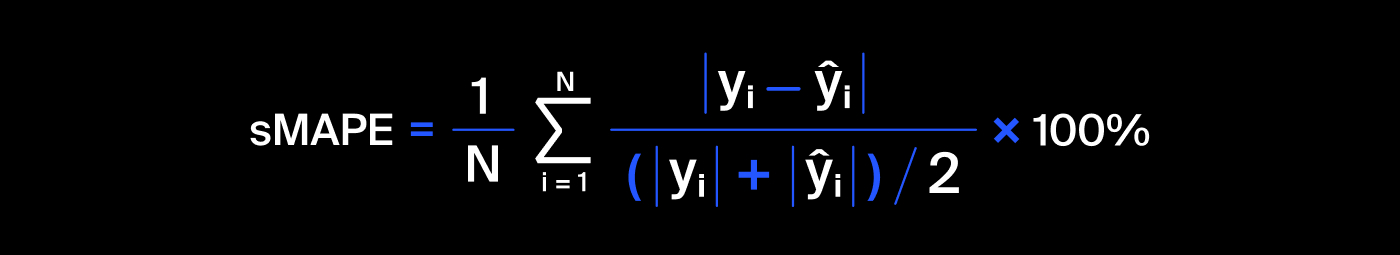



In [52]:
# функция для расчета smape
def smape(target, pred):
    return 100 * (abs(target - pred) / ((abs(target) + abs(pred)) / 2)).mean()

In [53]:
# сделаем smape кастомной метрикой для выбора лучшей модели: чем меньше, тем лучше
smape_scorer = make_scorer(smape, greater_is_better=False)

Нужно спрогнозировать сразу две величины: `rougher.output.recovery` и `final.output.recovery`, поэтому итоговая метрика складывается из двух величин:

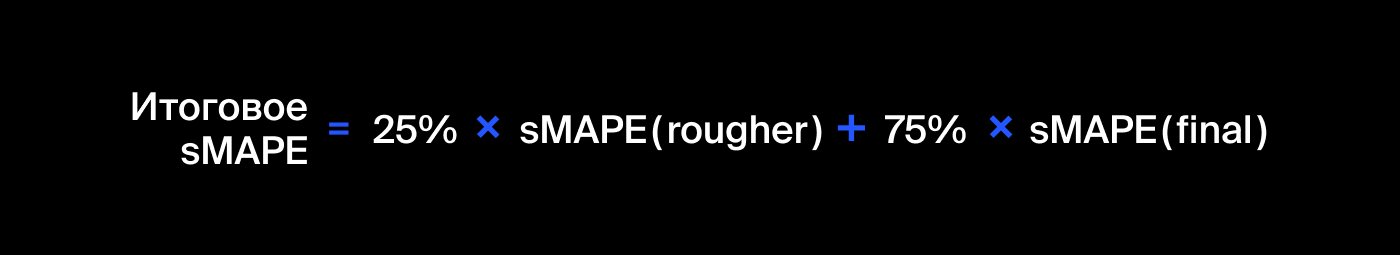

In [54]:
# функция для расчета итооговоого smape 
def summary_smape(smape_rougher,smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

### Обучение и тестирование моделей 
Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

Будем испытывать 3 модели для решения задачи регресси с помощью метода обучения с учителем:
1. Случайный лес
2. Линейная регреессия с регуляризацией Lasso
3. Линейная регрессия с комбинированной регуляризацией ElasticNet

Для выбора лучшей модели используемкастомную метрику sMAPE

In [55]:
# заготовим таблицу для фиксации результатов
results_df = pd.DataFrame(columns= ['rougher_smape', 'final_smape', 'summary_smape'],
                          index=['RandomForestRegressor', 'Lasso', 'ElasticNet'] )
results_df

,rougher_smape,final_smape,summary_smape
RandomForestRegressor,NaN,NaN,NaN
Lasso,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN


In [56]:
# функция для передачи стиля форматирования таблицам: 
# - изменить формат на float
# - отображать 3 знака после запятой
# - выделить максимальное значение в строке
def table_style(data):
    data = data.astype('float')
    styler = data.style.set_precision(3).highlight_min(axis=0, color='#DDFF')
    return styler


#### Случайный лес

In [57]:
%%time
# определим модель для ROUGHER
model_RFR_rougher = RandomForestRegressor(random_state=0, n_jobs=-1)
# обучим
model_RFR_rougher.fit(features_train_rougher, target_train_rougher)
# кросс-валидацией определим среднее значение метрики smape
cv_rougher_RFR = -cross_val_score(model_RFR_rougher, features_train_rougher, target_train_rougher, cv=3, n_jobs=-1,
                                scoring=smape_scorer).mean()

# занесём в таблицу
results_df.loc['RandomForestRegressor', 'rougher_smape'] = cv_rougher_RFR

CPU times: user 1min 6s, sys: 391 ms, total: 1min 6s
Wall time: 1min 6s


In [58]:
%%time
# определим и обучим модель для FINAL
model_RFR_final = RandomForestRegressor(random_state=0, n_jobs=-1)
model_RFR_final.fit(features_train_final, target_train_final)
# посчитаем метрику кросс_валидацией
cv_final_RFR = -cross_val_score(model_RFR_final, features_train_final, target_train_final, cv=3, n_jobs=-1,
                                scoring=smape_scorer).mean()

# в таблицу
results_df.loc['RandomForestRegressor', 'final_smape'] = cv_final_RFR

CPU times: user 2min 52s, sys: 481 ms, total: 2min 52s
Wall time: 2min 53s


In [59]:
# суммарная метрика, если для обеих моделей выберем Случайный лес
summary_smape_RFR = summary_smape(cv_rougher_RFR, cv_final_RFR)
results_df.loc['RandomForestRegressor', 'summary_smape'] = summary_smape_RFR

#### Lasso
Линейная регрессия с регуляризацией L1.  

In [58]:
# определим, обучим модель Lasso для ROUGHER
model_Lasso_rougher = Lasso(alpha=0.5)
model_Lasso_rougher.fit(features_train_rougher, target_train_rougher)
# найдём smape
cv_rougher_Lasso = -cross_val_score(model_Lasso_rougher, features_train_rougher, target_train_rougher, cv=3, 
                                scoring=smape_scorer).mean()

# занесём в таблицу
results_df.loc['Lasso', 'rougher_smape'] = cv_rougher_Lasso

In [61]:
# определим, обучим модель Lasso для FINAL
model_Lasso_final = Lasso(alpha=0.5)
model_Lasso_final.fit(features_train_final, target_train_final)
cv_final_Lasso = -cross_val_score(model_Lasso_final, features_train_final, target_train_final, cv=3, 
                                scoring=smape_scorer).mean()

# занесём в таблицу
results_df.loc['Lasso', 'final_smape'] = cv_final_Lasso

In [63]:
# суммарный smape, если для обоих признаков выбираем Lasso
summary_smape_Lasso = summary_smape(cv_rougher_Lasso, cv_final_Lasso)
results_df.loc['Lasso', 'summary_smape'] = summary_smape_Lasso

#### ElasticNet
Линейная регрессия с регуляризацией L1 + L2.  

In [64]:
# определим, обучим модель ElasticNet для ROUGHER
model_ElasticNet_rougher = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_ElasticNet_rougher.fit(features_train_rougher, target_train_rougher)
# найдём smape, в коде минус, чтобы убрать минус у метрики
cv_rougher_ElasticNet = - cross_val_score(model_ElasticNet_rougher, features_train_rougher, target_train_rougher,
                                          cv=3, scoring=smape_scorer).mean()

# занесём в таблицу
results_df.loc['ElasticNet', 'rougher_smape'] = cv_rougher_ElasticNet

In [65]:
# определим, обучим модель ElasticNet для FINAL
model_ElasticNet_final = ElasticNet(alpha=0.01)
model_ElasticNet_final.fit(features_train_final, target_train_final)
cv_final_ElasticNet = -cross_val_score(model_ElasticNet_final, features_train_final, target_train_final, cv=3, 
                                scoring=smape_scorer).mean()

# занесём в таблицу
results_df.loc['ElasticNet', 'final_smape'] = cv_final_ElasticNet

In [66]:
# суммарный smape, если для обоих признаков выбираем ElasticNet
results_df.loc['ElasticNet', 'summary_smape'] = summary_smape(cv_rougher_ElasticNet, cv_final_ElasticNet)

In [67]:
# выведем таблицу
table_style(results_df)

,rougher_smape,final_smape,summary_smape
RandomForestRegressor,8.195,10.536,9.951
Lasso,7.961,9.471,9.093
ElasticNet,8.255,11.981,11.049


Линейная модель Lasso с регуляризацией L1 даёт лучший результат sMAPE и для каждой модели отдельно и суммарной.

В качестве лучшей модели выбираем Lasso для предсказания обоих целевых признаков.

#### Подбор гиперпараметров для Lasso
Попробуем улучшить качество линейной модели Lasso подбором оптимальных гиперпараметров.

In [59]:
# зададим диапазоны ГП
params = {'alpha': np.arange(0, 1, 0.1),
            'fit_intercept': [True, False]}

# поиск гридсёрчем для ROUGHER
gs_Lasso_rougher = GridSearchCV(estimator=model_Lasso_rougher, param_grid=params, cv=3, 
                                scoring=smape_scorer)

# обучаем и оцениваем с кросс-валидацией на тренировочной выборке
gs_Lasso_rougher.fit(features_train_rougher, target_train_rougher)

# sMape выбранной модели
smape_Lasso_gs_rougher = -gs_Lasso_rougher.best_score_
# занесём в таблицу
results_df.loc['Lasso_GS', 'rougher_smape'] = smape_Lasso_gs_rougher

# выведем результат
f'Подобранные гиперпараметры: {gs_Lasso_rougher.best_estimator_},\nsMape: {smape_Lasso_gs_rougher}'

'Подобранные гиперпараметры: Lasso(alpha=0.30000000000000004),\nsMape: 7.7233891823096075'

In [62]:
# поиск гридсёрчем для FINAL
gs_Lasso_final = GridSearchCV(estimator=model_Lasso_final, param_grid=params, cv=3,  
                                scoring=smape_scorer)

# обучаем и оцениваем с кросс-валидацией на тренировочной выборке
gs_Lasso_final.fit(features_train_final, target_train_final)

# sMape выбранной модели
smape_Lasso_gs_final = -gs_Lasso_final.best_score_
# занесём в таблицу
results_df.loc['Lasso_GS', 'final_smape'] = smape_Lasso_gs_final

# выведем результат

f'Подобранные гиперпараметры: {gs_Lasso_final.best_estimator_},\nsMape: {smape_Lasso_gs_final}'

'Подобранные гиперпараметры: Lasso(alpha=0.6000000000000001),\nsMape: 9.44770508381727'

In [70]:
results_df.loc['Lasso_GS', 'summary_smape'] = summary_smape(smape_Lasso_gs_rougher, smape_Lasso_gs_final)

In [71]:
# выведем таблицу
table_style(results_df)

,rougher_smape,final_smape,summary_smape
RandomForestRegressor,8.195,10.536,9.951
Lasso,7.961,9.471,9.093
ElasticNet,8.255,11.981,11.049
Lasso_GS,7.723,9.448,9.017


Мы смогли немного улучшить метрику smape для выбранных моделей Lasso для предсказания обоих целевых признаков.

#### Feature importance
Посмотрим, как наши модели оценили важность признаков ~(сами мы не умеем)~  
В сортировке ориентируемся на модель Lasso, для которой характерно "удаление" незначимых по её мнению признаков.

In [72]:
def table_style_for_imp(data):
    return data.style.set_precision(3).highlight_max(axis=0, color='#DDFF')


In [73]:
# таблица важности признако
feature_imp_rougher = pd.DataFrame({
    'RFR_rougher, %': model_RFR_rougher.feature_importances_*100,
    'Lasso_rougher': abs(gs_Lasso_rougher.best_estimator_.coef_), # по модулю, так как нам знак не важен
    'ElasticNet_rougher': abs(model_ElasticNet_rougher.coef_)},
    index=features_train_rougher.columns)
# отсортируем по Lasso убывание
feature_imp_rougher.sort_values(by='Lasso_rougher', ascending=False)

,"RFR_rougher, %",Lasso_rougher,ElasticNet_rougher
rougher.input.feed_ag,14.225693,1.845559,1.627393
rougher.state.floatbank10_a_level,3.602256,1.808685,2.139571
rougher.input.feed_sol,5.278794,1.445019,2.178251
rougher.input.floatbank10_xanthate,4.607449,1.233468,2.786520
rougher.input.feed_pb,11.013259,1.064927,0.991927
rougher.input.floatbank10_sulfate,1.661001,0.562613,2.046255
rougher.state.floatbank10_c_air,4.295393,0.453504,1.156180
rougher.input.floatbank11_sulfate,2.982935,0.322622,0.881080
rougher.state.floatbank10_a_air,19.967092,0.301730,0.050430
rougher.input.feed_au,4.556772,0.162749,0.594425


In [74]:
# таблица важности признаков
feature_imp_final = pd.DataFrame({
    'RFR_rougher':model_RFR_final.feature_importances_*100,
    'Lasso_final': abs(gs_Lasso_final.best_estimator_.coef_),
    'ElasticNet_final': abs(model_ElasticNet_final.coef_)},
    index=features_train_final.columns)
feature_imp_final.sort_values(by='Lasso_final', ascending=False)

,RFR_rougher,Lasso_final,ElasticNet_final
rougher.input.floatbank10_xanthate,4.711188,1.762307,2.060199
rougher.input.feed_au,3.311910,1.196219,3.139623
primary_cleaner.input.sulfate,12.577369,1.056161,1.556535
secondary_cleaner.state.floatbank3_a_air,1.642587,0.748978,1.394962
rougher.input.feed_sol,1.930536,0.633376,1.011529
rougher.input.feed_ag,15.968845,0.437628,0.048450
secondary_cleaner.state.floatbank4_a_air,1.197319,0.287741,0.518618
primary_cleaner.state.floatbank8_b_air,1.403283,0.221593,0.888602
rougher.state.floatbank10_c_air,1.045732,0.217209,0.887204
rougher.input.floatbank10_sulfate,1.825315,0.161089,1.156656


Потенциальный вариант для улучшения качества обучения - взять признаки с наибольшей важностью (для Lasso все больше нуля) и обучить модель на них.

#### Проверка модели на тестовой выборке
Испытаем обученную модель Lasso c  подобранными гиперпараметрами на тестовой выборке

In [75]:
# предсказания для rougher + smape, используем модель из гридсёрча
pred_Lasso_gs_rougher_test = gs_Lasso_rougher.best_estimator_.predict(features_test_rougher)
smape_Lasso_gs_rougher_test = smape(target_test_rougher, pred_Lasso_gs_rougher_test)

# предсказания для final + smape, используем модель из гридсёрча
pred_Lasso_gs_final_test = gs_Lasso_final.best_estimator_.predict(features_test_final)
smape_Lasso_gs_final_test = smape(target_test_final, pred_Lasso_gs_final_test)

# оба smape + итоговый занесём в таблицу
results_df.loc['Lasso_GS_TEST', 'rougher_smape'] = smape_Lasso_gs_rougher_test
results_df.loc['Lasso_GS_TEST', 'final_smape'] = smape_Lasso_gs_final_test

results_df.loc['Lasso_GS_TEST', 'summary_smape'] = \
                    summary_smape(smape_Lasso_gs_rougher_test, smape_Lasso_gs_final_test)

In [76]:
# выведем таблицу
table_style(results_df)

,rougher_smape,final_smape,summary_smape
RandomForestRegressor,8.195,10.536,9.951
Lasso,7.961,9.471,9.093
ElasticNet,8.255,11.981,11.049
Lasso_GS,7.723,9.448,9.017
Lasso_GS_TEST,4.336,7.095,6.405


Результат предсказания на тестовой выборке значительно лучше валидационных результатов  
Итоговый sMAPE = 6.4  
*Скорее всего, улучшение метрики на тестовой выборке связано с отличием в распределении тестовой и обучающей выборки*

#### Dummy-модель
Чтобы интерпретировать полученный результат, оценим константную модель, которая всегда предсказывает медиану, и сравним с результатом обученной модели Lasso. с подобранными ГП.

In [77]:
# сгенерируем результат простой модели, которая бы всегда предсказывала медиану
dummy_pred_rougher = pd.Series(target_train_rougher.median(), test_df.index)
dummy_pred_final = pd.Series(target_train_final.median(), test_df.index)

# рассчитаем smape
dummy_smape_rough = smape(target_test_rougher, dummy_pred_rougher)
dummy_smape_final = smape(target_test_final, dummy_pred_final)

# также занесём в итоговую таблицу
results_df.loc['Dummy', 'rougher_smape'] = dummy_smape_rough
results_df.loc['Dummy', 'final_smape'] = dummy_smape_final

# сразу в таблицу суммарный smape
results_df.loc['Dummy', 'summary_smape'] = summary_smape(dummy_smape_rough, dummy_smape_final)

In [78]:
# выведем таблицу
table_style(results_df)

,rougher_smape,final_smape,summary_smape
RandomForestRegressor,8.195,10.536,9.951
Lasso,7.961,9.471,9.093
ElasticNet,8.255,11.981,11.049
Lasso_GS,7.723,9.448,9.017
Lasso_GS_TEST,4.336,7.095,6.405
Dummy,4.729,8.060,7.227


На тестовой выборке обученная модель Lasso с подобранными гиперпараметрами даёт результат  лучше, чем константная модель.

***Промежуточные итоги:***

- Для выбора лучшей модели введена пользовательская метрика sMAPE.
- Обучено и оценено с помощью кросс-валидации 3 модели для решения задачи регресси: Случайный лес, Линейная регреессия с регуляризацией Lasso, Линейная регрессия с комбинированной регуляризацией ElasticNet.
- Лучший результат для предсказания обоих признаков показала модель Lasso. Для неё проведён подбор оптимальных гиперпараметров.
- Выбранная модель имеет положительный результат испытаний на тестовой выборке и предсказывает лучше, чем константная модель (медиана).

___
___

## Выводы
Поставлена задача подготовить прототип модели машинного обучения, который с целью оптимизации работы предприятия будет прогнозировать две величины:
- Эффективность обогащения чернового концентрата `rougher.output.recovery`
- Эффективность обогащения финального концентрата `final.output.recovery`

Заказчиком предоставлены данные с параметрами процесса флотации за период янв. 2016 - сент. 2019. 3 датасета, всего 87 признаков и 19439 объектов. Тестовая выборка с необходимым набором признаков и подходящим распределением объектов предварительно заготовлена. 

Данные исследованы на корректность и выявление зависимостей.  
При анализе выявлено, что концентрация всех компонентов и, оособенно подозрительно, их суммы может быть равна нулю. Это может приводить к нулевым значениям целевых признаков, которые являются расчётными. Требуется пояснение профильного специалиста.

Для подготовки данных к машинному обучение проведено устранение "аномальных" значений (нулевые суммарные концентрации и объекты с целевым признаком равным 0 или 100) и пропусков, отбор признаков и масштабирование.

Для выбора оптимального решения введена метрика sMAPE.  
Для предсказывания каждого из двух целевых признаков строилась отдельная модель.

Для решения задачи протестировано 3 модели регресси: Случайный Лес и линейные регрессии с регуляризацией: Lasso и ElasticNet.  

**Результат:**

Лучший результат для прогнозирования обоих целевых признаков показала линейная модель **Lasso** (L1-регуляризация позволяет автоматически выбирать наиболее важные признаки и уменьшать влияние несущественных признаков). 
Модель подтвердила результат на тестовой выборке summary_sMAPE = 6.4% (4.3% + 7.1%)


Для улучшения модели необходимо более детальное изучение технологического процесса и его параметроов (признаков).